In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
numpoints=1000
numbins=5

In [3]:
points=np.random.normal(size=numpoints)

In [4]:
counts,edges=np.histogram(points,bins=numbins)

In [5]:
binlength=(edges[1]-edges[0])

In [6]:
density=counts/binlength

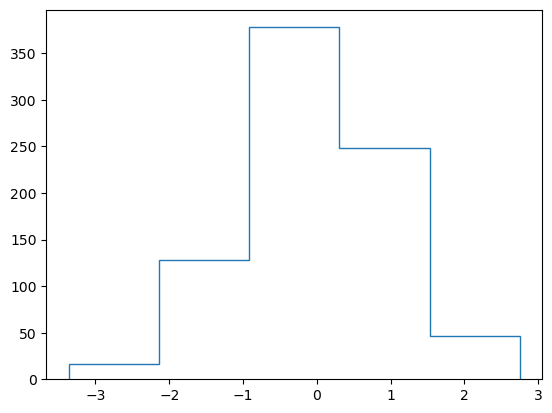

In [7]:
plt.stairs(density,edges)

In [8]:
fftdensity=np.fft.fft(density)

In [9]:
fftdensity

array([ 818.15045202  +0.j        , -436.54657537-153.79242151j,
         68.37887196 +74.85127937j,   68.37887196 -74.85127937j,
       -436.54657537+153.79242151j])

tried with real fft version to see and then it just removes the complex conjugates? not sure why those are needed. is it safe to use the real version since the inputs are real numbers? after reading the documentation it seems like yes but i'll leave it as complex for now
array([ 714.28129336  +0.j        , -303.21198538-321.2861087j ,
         -2.14326754+111.23818116j]) for five bins


In [11]:
k=2*np.pi/numbins

In [12]:
fftpotential=fftdensity*(-1/k**2)

In [13]:
potential=np.fft.ifft(fftpotential).real

In [14]:
potential

array([ -10.36199652,  -81.34167272, -239.36211972, -157.50234717,
        -29.53169009])

now need potential gradient. need to add ghost cells and then just do simple centered difference method. remember that deltax is the binlength. do zero outflow gradient for ghost cells.

In [16]:
potentialghosts=np.insert(potential,0,0)

In [17]:
potentialghosts=np.append(potentialghosts,0)

In [18]:
potentialghosts

array([   0.        ,  -10.36199652,  -81.34167272, -239.36211972,
       -157.50234717,  -29.53169009,    0.        ])

In [19]:
gradient=np.zeros(numbins)
for i in range(numbins):
    gradient[i]=(potentialghosts[i+1]-potentialghosts[i-1])/(2*binlength)

In [20]:
gradient

array([ -4.23883607, -33.27486315, -93.67827715, -31.15544512,
        85.83643042])

now iterate to the next step

In [22]:
deltat=1

In [23]:
vt=np.zeros(numpoints)

In [24]:
edges

array([-3.36056328, -2.1382942 , -0.91602512,  0.30624396,  1.52851304,
        2.75078212])

In [25]:
binlabels=np.digitize(points.round(8),edges,right=True)

In [26]:
np.where(binlabels==6)

(array([], dtype=int64),)

In [27]:
points[17]

-0.8838360310922632

In [28]:
vt1=np.zeros(numpoints)

In [29]:
for i in range(numpoints):
    ibin=binlabels[i]
    vt1[i]=vt[i]*points[i]-deltat*gradient[ibin-1]

In [30]:
vt1

array([ 33.27486315,  93.67827715,  31.15544512,  33.27486315,
        93.67827715,  93.67827715,  31.15544512,  31.15544512,
        93.67827715,  93.67827715,  93.67827715,  31.15544512,
        93.67827715,  93.67827715,  31.15544512,  31.15544512,
        93.67827715,  93.67827715,  33.27486315,  93.67827715,
        33.27486315,  93.67827715,  33.27486315,  93.67827715,
        31.15544512,  33.27486315,  93.67827715,  93.67827715,
        93.67827715,  31.15544512,  93.67827715,  33.27486315,
        93.67827715,  93.67827715,  93.67827715,  31.15544512,
        31.15544512,  33.27486315,  31.15544512,  33.27486315,
        31.15544512,  93.67827715,  31.15544512,  93.67827715,
        33.27486315,  31.15544512,  31.15544512,  93.67827715,
        33.27486315,  93.67827715,  33.27486315,  33.27486315,
       -85.83643042,  31.15544512,  33.27486315,  31.15544512,
        93.67827715,  33.27486315,  93.67827715,  33.27486315,
        93.67827715,  33.27486315,  31.15544512,  93.67

In [31]:
points=points+vt1

In [32]:
points

array([ 31.74694946,  93.21738284,  32.20240845,  32.21855681,
        93.96959529,  93.97692992,  31.79256763,  32.29938252,
        93.15905507,  93.95225618,  93.48798941,  32.24723761,
        93.5765029 ,  93.74789813,  31.72640804,  31.7801646 ,
        92.83213561,  92.79444112,  32.25375906,  93.37101991,
        32.06295001,  93.27299042,  32.16098682,  93.51017014,
        32.10287929,  31.93854482,  92.85152523,  93.44895553,
        93.68092007,  31.48683035,  93.54026205,  31.85150814,
        93.53658058,  93.35503154,  93.29152733,  31.74904042,
        31.86922836,  32.09481428,  31.5886022 ,  32.17603696,
        31.54249615,  93.27444936,  31.76520667,  93.66855686,
        31.27268153,  31.98683135,  31.556287  ,  93.74273063,
        32.30337793,  93.24623304,  31.17525628,  31.43556694,
       -83.90297618,  32.50054924,  32.24091591,  31.74320645,
        93.85604752,  32.05404132,  93.29844716,  32.15667225,
        93.11105188,  31.83870298,  32.29980908,  93.66